    - Gallo, Florentina
    - Grillo, Gian Franco
    - Pizzingrilli, Federico
    - Quiroga, Gerardo

# 

Imports para los ejercicios

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA


In [2]:
#Seteo para ver todas las columnas cuando muestro un dataframe
pd.set_option('display.max_columns', None)

%matplotlib inline

# 

# 

# CONSIGNA

Objetivos Generales:

- Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data 
- Science.
- Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
    
    
Construir una presentación ejecutiva para la alta gerencia mostrando los resultados obtenidos.


Objetivos Específicos:

- Desarrollar las instancias de Data Acquisition y Data Wrangling en tu trabajo final.
- Lograr una articulación en equipo y una división de tareas adecuadas a los objetivos.
- Realizar Filtrado
- Describir qué significa cada variable, cómo se comporta.
- Especificar las distribuciones y relaciones (géneros, sexo, edad, IVA, tipo de empresa).

Se debe entregar:

- Presentación de la empresa, organización o problema específico.
- Preguntas y objetivos de la investigación.
- Conformación del equipo de trabajo.
- Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).
- Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.
- Análisis de componentes principales.
- Contar la historia de sus datos
- Filtros aplicados a los datos. Distribución. Dataset final para analizar.
- Plottear objetivos u objetivo para esos datos.


#  

# 

# Presentación

El equipo está conformado por:

    - Gallo, Florentina
    - Grillo, Gian Franco
    - Pizzingrilli, Federico
    - Quiroga, Gerardo

Los temas de interés principales del equipo son Música, Deportes, y Salud.

Con esta premisa se comenzó con la búsqueda de diferentes datasets de las principales temáticas de interés.

Si bien se barajaron diferentes opciones, se decidió abordar la temática musical.

Para esto, se encontró el set de datos "The Spotify Hit Predictor" con pistas de entre 1960 y 2019, clasificadas en si fueron un hit o no.

Se estudiará y analizará el mismo, únicamente en la década de 2010's, para cumplir con los requisitos de volumen de datos solicitados.

Se espera obtener un modelo de clasificación binaria que clasifique pistas en 'Hit' o 'Flop' (No Hit).



# 

# 

## The Spotify Hit Predictor Dataset (1960-2019).

Este dataset contiene features de canciones obtenidas mediante la API de Spotify. Las pistan están etiquetadas como '1' o '0' ('Hit' o 'Flop') dependiendo de algunos criterios del autor.

Este set de datos contiene información de las pistas, tanto características, como artista y nombre, como de índole "musical" de las mismas, como la energía y la acusticidad.

Este conjunto de datos se puede usar para hacer un modelo de clasificación que predice si una pista sería un 'Hit' o no. Las pistas son clasificadas como 'Hit' si es que formaron parte de la lista Hot-100 de los Billboard al menos 1 vez.

(Nota: el autor no considera objetivamente una pista inferior, mala o un fracaso si está etiquetada como 'Flop'. 'Flop' aquí simplemente implica que es una pista que probablemente no podría considerarse popular en el mainstream).

Si bien se cuenta con pistas entre 1960 y 2019, se utilizarán únicamente pistas entre 2010-2019 por el alto volumen del dataset.

#### Fuente

https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset?select=dataset-of-10s.csv

# 

# 

# Data Acquisition

Cargamos y vemos el dataset.

Tal como se mencionó anteriormente, únicamente se utilizarán las pistas de la década de 2010's debido al alto volumen del dataset, y para cumplir con lo solicitado.

In [3]:
df_spotify = pd.read_csv('https://raw.githubusercontent.com/gfgrillo3/DS_CoderHouse/main/Datasets/dataset-of-10s.csv', sep=',')

df_spotify

track                          artist  \
0                             Wild Things                    Alessia Cara   
1                               Surfboard                       Esquivel!   
2                            Love Someone                    Lukas Graham   
3     Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4           Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   
...                                   ...                             ...   
6393                        Lotus Flowers                           Yolta   
6394                    Calling My Spirit                     Kodak Black   
6395                        Teenage Dream                      Katy Perry   
6396                       Stormy Weather                  Oscar Peterson   
6397                                 Dust                     Hans Zimmer   

                                       uri  danceability  energy  key  \
0     spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1   
1     spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   
2     spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9   
3     spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0   
4     spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1   
...                                    ...           ...     ...  ...   
6393  spotify:track:4t1TljQWJ6ZuoSY67zVvBI         0.172   0.358    9   
6394  spotify:track:2MShy1GSSgbmGUxADNIao5         0.910   0.366    1   
6395  spotify:track:55qBw1900pZKfXJ6Q9A2Lc         0.719   0.804   10   
6396  spotify:track:4o9npmYHrOF1rUxxTVH8h4         0.600   0.177    7   
6397  spotify:track:2khIaVUkbMmDHB596lyMG3         0.121   0.123    4   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0       -4.826     0       0.0886       0.02000          0.000000    0.0828   
1      -14.661     0       0.0346       0.87100          0.814000    0.0946   
2       -6.557     0       0.0520       0.16100          0.000000    0.1080   
3       -5.698     0       0.0527       0.00513          0.000000    0.2040   
4       -3.892     1       0.2750       0.00381          0.000000    0.3910   
...        ...   ...          ...           ...               ...       ...   
6393   -14.430     1       0.0342       0.88600          0.966000    0.3140   
6394    -9.954     1       0.0941       0.09960          0.000000    0.2610   
6395    -4.581     1       0.0355       0.01320          0.000003    0.1390   
6396   -16.070     1       0.0561       0.98900          0.868000    0.1490   
6397   -23.025     0       0.0443       0.96400          0.696000    0.1030   

      valence    tempo  duration_ms  time_signature  chorus_hit  sections  \
0      0.7060  108.029       188493               4    41.18681        10   
1      0.2500  155.489       176880               3    33.18083         9   
2      0.2740  172.065       205463               4    44.89147         9   
3      0.2910   91.837       193043               4    29.52521         7   
4      0.7800  160.517       144244               4    24.99199         8   
...       ...      ...          ...             ...         ...       ...   
6393   0.0361   72.272       150857               4    24.30824         7   
6394   0.7400  119.985       152000               4    32.53856         8   
6395   0.6050  119.999       227760               4    20.73371         7   
6396   0.5600  120.030       213387               4    21.65301        14   
6397   0.0297   95.182       341396               4    71.05343        15   

      target  
0          1  
1          0  
2          1  
3          0  
4          1  
...      ...  
6393       0  
6394       1  
6395       1  
6396       0  
6397       0  

[6398 rows x 19 columns]

# 

# 

# Descripción de variables

- track: Nombre de la canción.


- artist: Nombre del artista.


- uri: Identificador del recurso de la canción.


- danceability: Capacidad de baile. Describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable


- energy: la energía es una medida de 0.0 a 1.0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, altas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, frecuencia de inicio y entropía general.


- key: Clave general estimada de la pista. Los enteros se asignan a los tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C?/D?, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.


- loudness: Volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 db.


- mode: Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.


- speechiness: El habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida a un discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no se parecen al habla.


- acousticness: Medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.


- instrumentalness: Predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0. 


- liveness: Detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté "en vivo".


- valence: Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (p. Ej., Feliz, alegre, eufórico), mientras que las pistas con valencia baja suenan más negativas (p. Ej., Triste, deprimido, enojado).


- tempo: El tempo global estimado de una pista en tiempos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media del tiempo.


- duration_ms: Duración de la pista en milisegundos.


- time_signature: Una signatura de tiempo total estimada de una pista. Convención de notación para especificar cuántos tiempos hay en cada compás.


- chorus_hit: Esta es la mejor estimación del autor de cuándo comenzaría el coro para la pista. Es la marca de tiempo del inicio de la tercera sección de la pista. Esta función se extrajo de los datos recibidos por la llamada API para el análisis de audio de esa pista en particular.


- sections: El número de secciones que tiene la pista en particular. Esta función se extrajo de los datos recibidos por la llamada a la API para el análisis de audio de esa pista en particular.


- target: La variable objetivo de la pista. Puede ser '0' o '1'. '1' implica que esta canción ha aparecido en la lista semanal (emitida por Billboards) de pistas Hot-100 en esa década al menos una vez y, por lo tanto, es un 'Hit'. '0' Implica que la pista no es un 'Hit' ('Flop').
    La condición del autor para que una pista sea 'flop' es la siguiente:

        - La pista no debe aparecer en la lista de 'hits' de esa década.
        - El artista de la pista no debe aparecer en la lista de 'hits' de esa década.
        - La pista debe pertenecer a un género que pueda considerarse no mainstream y/o vanguardista.
        - El género de la pista no debe tener una canción en la lista de "hits".
        - La pista debe tener 'US' como uno de sus mercados   

# 

# 

# EDA - Análisis exploratorio de datos

#### Tamaño 

In [4]:
print("{} filas y {} columnas.".format(df_spotify.shape[0], df_spotify.shape[1]))

6398 filas y 19 columnas.


# 

#### Info resumen del DF

In [5]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


Tenemos 19 variables, siendo: 
- 3 características de la pista como nombre, artista, y URI. 
- 1 Variable target.
- 15 variables deescriptivas.

# 

#### Estadísticas descriptivas del DF 

In [6]:
df_spotify.describe().T

count           mean           std           min  \
danceability      6398.0       0.568163      0.191103      0.062200   
energy            6398.0       0.667756      0.240721      0.000251   
key               6398.0       5.283526      3.606216      0.000000   
loudness          6398.0      -7.589796      5.234592    -46.655000   
mode              6398.0       0.645514      0.478395      0.000000   
speechiness       6398.0       0.098018      0.097224      0.022500   
acousticness      6398.0       0.216928      0.296835      0.000000   
instrumentalness  6398.0       0.165293      0.318736      0.000000   
liveness          6398.0       0.196700      0.166148      0.016700   
valence           6398.0       0.443734      0.245776      0.000000   
tempo             6398.0     122.353871     29.847389     39.369000   
duration_ms       6398.0  236704.210378  85636.984343  29853.000000   
time_signature    6398.0       3.930916      0.377469      0.000000   
chorus_hit        6398.0      41.028399     19.568827      0.000000   
sections          6398.0      10.316505      3.776011      2.000000   
target            6398.0       0.500000      0.500039      0.000000   

                            25%            50%            75%           max  
danceability           0.447000       0.588000       0.710000  9.810000e-01  
energy                 0.533000       0.712500       0.857000  9.990000e-01  
key                    2.000000       5.000000       8.000000  1.100000e+01  
loudness              -8.425000      -6.096500      -4.601250 -1.490000e-01  
mode                   0.000000       1.000000       1.000000  1.000000e+00  
speechiness            0.038825       0.057200       0.112000  9.560000e-01  
acousticness           0.008533       0.067050       0.311000  9.960000e-01  
instrumentalness       0.000000       0.000017       0.057650  9.950000e-01  
liveness               0.096800       0.126000       0.249000  9.820000e-01  
valence                0.240000       0.434000       0.628000  9.760000e-01  
tempo                 98.091250     121.070000     141.085000  2.109770e+02  
duration_ms       193206.750000  221246.500000  259316.500000  1.734201e+06  
time_signature         4.000000       4.000000       4.000000  5.000000e+00  
chorus_hit            28.059135      36.265365      48.292538  2.131550e+02  
sections               8.000000      10.000000      12.000000  8.800000e+01  
target                 0.000000       0.500000       1.000000  1.000000e+00

# 

#### Análisis de nulos 

In [7]:
df_spotify.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

Vemos que no tenemos nulos

# 

#### Tipos de datos de las columnas

In [8]:
df_spotify.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

Los tipos de datos son cadenas (Strings), números decimales (floats), y números enteros (int)

# 

#### Columnas disponibles

In [9]:
df_spotify.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

# 

# 

# Análisis Univariados, Bivariados, y Multivariados

# 

#### Análisis variable artist

Sabemos que son los nombres de los artistas. Veamos el top 10 de los artistas con más canciones

In [10]:
df_cantidad_de_canciones_por_artistas = df_spotify[['track','artist']].groupby('artist').count().reset_index()

df_cantidad_de_canciones_por_artistas = df_cantidad_de_canciones_por_artistas.sort_values('track', ascending=False)

df_cantidad_de_canciones_por_artistas.rename(columns={'track':'tracks_count'}, inplace=True)

df_cantidad_de_canciones_por_artistas.head(10)

artist  tracks_count
846                   Drake            50
1153              Glee Cast            41
2819           Taylor Swift            35
1863             Luke Bryan            25
1454  Johann Sebastian Bach            25
2965             The Weeknd            24
2371            Post Malone            23
1264         Hiphop Tamizha            23
118       Alexandre Desplat            22
1379           Jason Aldean            22

# 

#### Análisis variable uri

uri es el identificador del recurso de la canción. No hay análisis para aplicar sobre esta variable. Al menos asegurémosnos que son uris únicas y no hay repetidos

In [11]:
df_spotify['uri'].duplicated().sum()

20

Vemos que tenemos uris repetidas. Es importante considerar esto, ya que la uri NO es un identificador único.

Guardemos estas uris, y veamos algunos casos

In [12]:
uris_duplicadas = df_spotify[df_spotify['uri'].duplicated()]['uri']

df_spotify[df_spotify['uri'].isin(uris_duplicadas)].sort_values('uri').head(10)

track                         artist  \
5813                      Take Care        Drake Featuring Rihanna   
2838                   Marvins Room                          Drake   
2996                     Sure Thing                         Miguel   
2823              All I Want Is You       Miguel Featuring J. Cole   
2590  It Don't Hurt Like It Used To               Billy Currington   
6300                       Don't It               Billy Currington   
4477                       Lil Baby                     Young Thug   
5127                    Bad Bad Bad  Young Thug Featuring Lil Baby   
860                         Circles                    Post Malone   
4690           Hollywood's Bleeding                    Post Malone   

                                       uri  danceability  energy  key  \
5813  spotify:track:047fCsbO4NdmwCBn8pcUXl         0.492   0.260    9   
2838  spotify:track:047fCsbO4NdmwCBn8pcUXl         0.492   0.260    9   
2996  spotify:track:0JXXNGljqupsJaZsgSbMZV         0.684   0.603   11   
2823  spotify:track:0JXXNGljqupsJaZsgSbMZV         0.684   0.603   11   
2590  spotify:track:0iA1unTbTbDOWUSlbwJ1pS         0.558   0.818    8   
6300  spotify:track:0iA1unTbTbDOWUSlbwJ1pS         0.558   0.818    8   
4477  spotify:track:1GeNui6m825V8jP4uKiIaH         0.974   0.596    6   
5127  spotify:track:1GeNui6m825V8jP4uKiIaH         0.974   0.596    6   
860   spotify:track:21jGcNKet2qwijlDFuPiPb         0.695   0.762    0   
4690  spotify:track:21jGcNKet2qwijlDFuPiPb         0.695   0.762    0   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
5813   -17.341     0       0.0921        0.6460          0.001780    0.0705   
2838   -17.341     0       0.0921        0.6460          0.001780    0.0705   
2996    -8.127     0       0.0989        0.0275          0.000311    0.1910   
2823    -8.127     0       0.0989        0.0275          0.000311    0.1910   
2590    -4.070     1       0.0403        0.0710          0.000000    0.2100   
6300    -4.070     1       0.0403        0.0710          0.000000    0.2100   
4477    -8.888     1       0.1840        0.0976          0.000000    0.1510   
5127    -8.888     1       0.1840        0.0976          0.000000    0.1510   
860     -3.497     1       0.0395        0.1920          0.002440    0.0863   
4690    -3.497     1       0.0395        0.1920          0.002440    0.0863   

      valence    tempo  duration_ms  time_signature  chorus_hit  sections  \
5813    0.312  111.519       347227               5    28.64767        11   
2838    0.312  111.519       347227               5    28.64767        11   
2996    0.504   81.000       195373               4    26.39306        10   
2823    0.504   81.000       195373               4    26.39306        10   
2590    0.453   81.034       184507               4    20.25420         7   
6300    0.453   81.034       184507               4    20.25420         7   
4477    0.892  111.959       149040               4    32.73631         8   
5127    0.892  111.959       149040               4    32.73631         8   
860     0.553  120.042       215280               4    52.05235         9   
4690    0.553  120.042       215280               4    52.05235         9   

      target  
5813       1  
2838       1  
2996       1  
2823       1  
2590       1  
6300       1  
4477       1  
5127       1  
860        1  
4690       1

Vemos que las URIS duplicadas no son ni de la misma canción, ni del mismo artista. Considerar esto para a futuro decidir que hacer sobre estos casos.

Probablemente, los dejemos fuera para evitar posibles problemas de duplicidad o de datos erróneos, ya que contamos con un volumen alto, y estos casos no representan ni el 0,5% del dataset.

# 

#### Análisis variable danceability

danceability es la Capacidad de baile. 

Esta variable pude influir altamente en si una canción es un hit o no, por eso creemos que no va a haber muchas canciones con valores de danceability muy altos ni muy bajos.

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='danceability', ylabel='Density'>

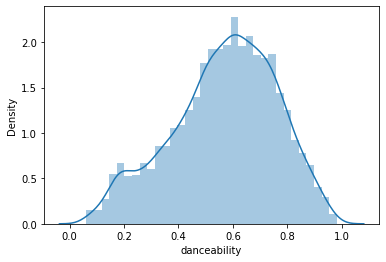

In [13]:
sns.distplot(df_spotify['danceability'])

Efectivamente, vemos que no hay muchas canciones con capacidad de baile menor 0.3, ni mayor a 0.8.

La capacidad de baile se concentra en torno al 0.6

# 

#### Análisis variable loudness

loudness es el volumen general de una pista medido en decibelios.

Siendo un promedio de toda la pista, podemos utilizar el redondeo de los mismos.

Sabiendo que el rango, es entre -60 y 0, calculemos el mínimo y el máximo de DeciBelios para dibujar 1 barra por DB.

<AxesSubplot:xlabel='loudness', ylabel='Count'>

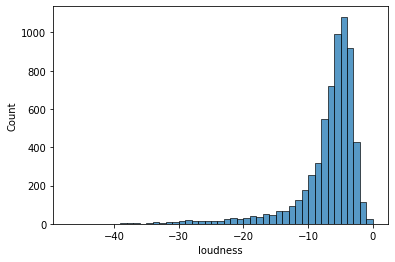

In [14]:
n_loudness_bins = int(abs(df_spotify['loudness'].round().min() - df_spotify['loudness'].round().max()))

sns.histplot(df_spotify['loudness'].round(), kde=False, bins=n_loudness_bins)

Vemos que tiene una distribución asimétrica sesgada a la izquierda

# 

#### Análisis de variable speachiness

speechiness detecta la presencia de palabras habladas en una pista.

Sabemos por definición, que podemos dividirlo en 3 categorías:

 - Menor a 0.33. Representa música y pistas que no se parecen al habla como canciones, o pistas de sólo música. Esta categoría la llamaremos CANCIONES Y PISTAS.
 - Entre 0.33 y 0.66. Representan pistas con música y habla, como canciones de contenido considerable de habla/relato por ejemplo RAP o TRAP.  Esta categoría la llamaremos CANCIONES HABLADAS.
 - Mayor a 0.66. Representan pistas totalmente habladas, como por ejemplo entrevistas, audiolibros, podcasts, etc. Esta categoría la llamaremos RELATOS.
 
Veamos la distribución de esta variable, y luego categoricémosla y analicemos las cantidades

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speechiness', ylabel='Density'>

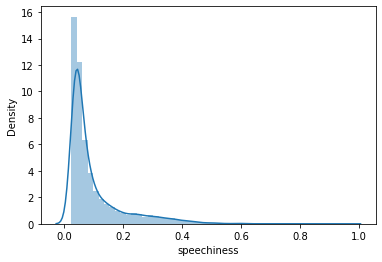

In [15]:
sns.distplot(df_spotify['speechiness'])

Vemos que tiene una distribución asimétrica sesgada a la derecha.

Esto quiere decir que tenemos muy pocas pistas que son audiolibros, poesías, relatos, entrevistas, etc., y que en su mayoría contamos con canciones, tanto sólo de música (pista) como cantadas por cantantes.

Categoricemos la variable, y veamos su distribución.

In [16]:
df_spotify['categorical_speechiness'] = df_spotify['speechiness'].apply(lambda x: 'CANCIONES Y PISTAS' if x<0.33 
                                                                        else('RELATO' if x>0.66 else 'CANCIONES HABLADAS'))

[Text(0, 0, '6100'), Text(0, 0, '291'), Text(0, 0, '7')]

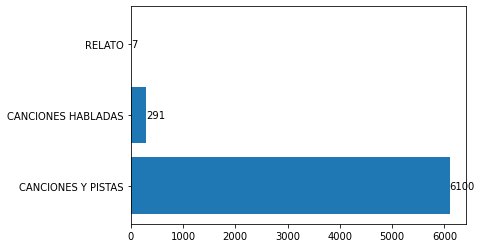

In [17]:
x_speechiness_plot = df_spotify['categorical_speechiness'].unique()
y_speechiness_plot = df_spotify['categorical_speechiness'].value_counts()
indexes_speechiness_plot = np.arange(len(y_speechiness_plot))

fig, ax = plt.subplots()
ax.barh(indexes_speechiness_plot, y_speechiness_plot)
ax.set_yticks(indexes_speechiness_plot)
ax.set_yticklabels(x_speechiness_plot)

# new helper method to auto-label bars
ax.bar_label(ax.containers[0])


Podemos ver que, tal como es de esperar, tenemos muchas canciones con un contenido moderado del habla. No hay tantas canciones cuasi-relatadas, y practicamente no hay canciones que sean relatos

# 

#### Análisis de variable valence

valence describe la positividad musical que transmite una pista, siendo los valores más altos canciones que suenan "más positivas".

Es de esperar que no sea un distintivo en las canciones, por lo que los valores deberían estar, dentro de todo, distribuidos equitativamente.

<AxesSubplot:xlabel='valence', ylabel='Count'>

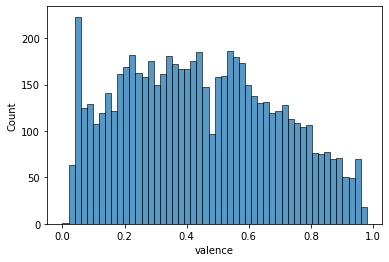

In [18]:
#Redondeemos a 2 decimales para obtener valores entre 0.00 y 1.00
#Agrupemos de a 0.02 

sns.histplot(df_spotify['valence'].round(2), bins=50)

Si bien tiende a tener una distribución constante, podemos ver que hay un pico en valores muy bajos de positividad musical, por lo que se puede decir que hay bastante cantidad de pistas con sentimientos como Triste, deprimido, enojado, etc.

# 

#### Análisis de variable duration_ms

duration_ms es la duración en milisegundos de las pistas.

Se cree que una canción, para ser un hit, tiene que tener una duración entre 3 y 5 minutos.
Hay casos que rompen con este esquema, como por ejemplo, Bohemian Rhapsody de Queen.

Convertimos esta variable en segundos, y veamos la distribución con un gráfico de cajas para calcular outliers

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='duration_s'>

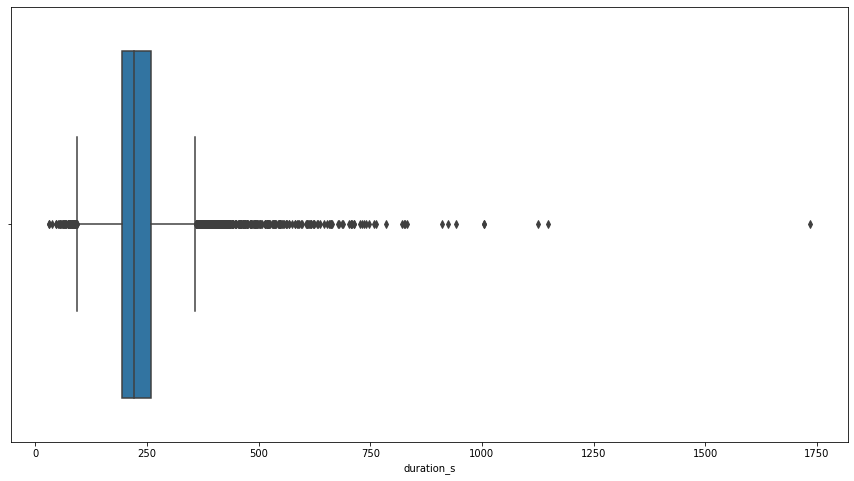

In [19]:
df_spotify['duration_s'] = (df_spotify['duration_ms']/1000).round()

#Agrandemos el gráfico
plt.figure(figsize=(15,8))

sns.boxplot(df_spotify['duration_s'])



Tal como creíamos, la mayor cantidad de pistas las tenemos entre 180 y 260 segundos aproximadamente (entre 3 y 4:20 minutos). 

Podemos observar que hay muchas pistas que están bastante por fuera de este rango de tiempo, siendo su duración menor a 120 segundos y mayor a 360 segundos aproximadamente (2 y 6 minutos respectivamente).

Para dejarlo más claro, veamos los valores con un .describe().

In [20]:
df_spotify['duration_s'].describe()

count    6398.000000
mean      236.701938
std        85.640113
min        30.000000
25%       193.000000
50%       221.000000
75%       259.000000
max      1734.000000
Name: duration_s, dtype: float64

# 

#### Análisis de variable target

target es la variable que indica si la pista fue un hit o no (HIT o FLOP).

Veamos la distribución de esta variable target binaria.

Se espera que el dataset esté desbalanceado teniendo menos HITS y más FLOPS. Veámoslo

In [21]:
#Aseguremos que efectivamente tenemos solo 0's y 1's

df_spotify['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

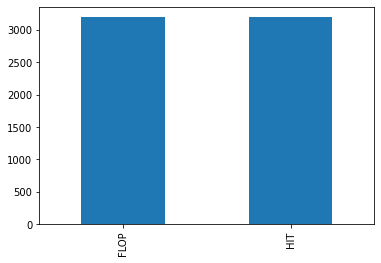

In [22]:
categorical_targets = df_spotify['target'].replace(to_replace=[0,1], value=['FLOP','HIT'])

categorical_targets.value_counts().plot.bar()

Contrario a lo esperado, tenemos un dataset balanceado.

# 

### Análisis  Duración - Hit

Si bien hay otras variables que influyen en que una canción sea hit, creemos que la duración media en segundos de las canciones que son hits, es considerablemente menor que la duración media de las que no son hits.

Veámoslo

In [23]:
#Calculamos los segundos, y veamos la duración media agrupada por target
df_spotify['duration_s'] = (df_spotify['duration_ms']/1000).round()

df_spotify[['duration_s', 'target']].groupby('target').mean().reset_index()

target  duration_s
0       0  252.903720
1       1  220.500156

Podemos ver que las canciones que son hits, tienen una duración promedio de 3:40 minutos, mientras que las canciones que no son hits tienen una duración media de 4:13 minutos

# 

### Análisis loudness - energy

Se espera que estas variables estén relacionadas. A medida que aumenta el volumen general de una pista ("loudness"), aumentará la energía de la misma.

Esto porque las pistas con mayor energía son las que se sienten más rápidas, altas y ruidosas. A su vez, el volumen general de una pista medido en decibelios, tal como se indica en la descripción de la variable, es el principal correlato psicológico de la fuerza física.

Veamos si se cumple esto

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loudness', ylabel='energy'>

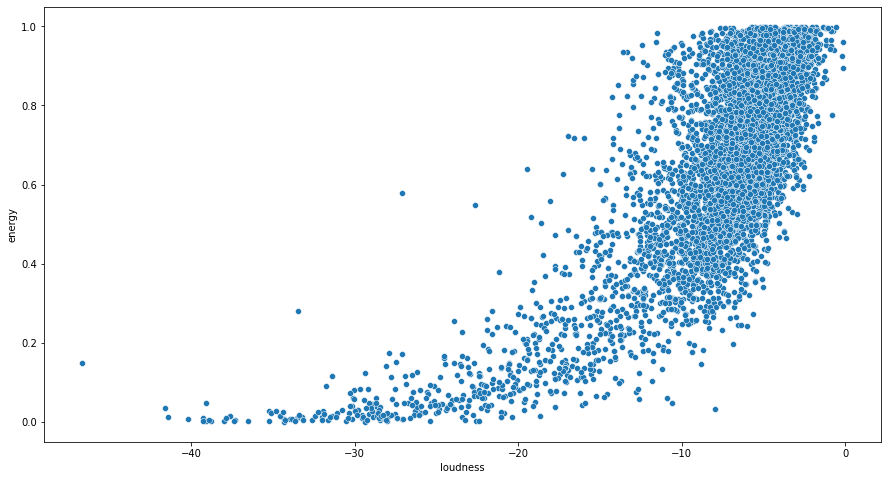

In [24]:
plt.figure(figsize=(15,8))

sns.scatterplot( df_spotify['loudness'], df_spotify['energy'])

Podemos ver que se cumple esta relación, y a medida que aumenta el volumen general ("loudness") aumenta la energía de la pista. 

Notar que la relación es similar a función exponencial.

# 

### Analisis danceability - target

Consideramos que hay relación entre las canciones con mayor capacidad de baile. 

Esperamos que, a mayor capacidad de baile, mayor cantidad de canciones que son hits habrá.

Veamoslo

In [25]:
#Quedemosnos con 3 columnas de utilidad.
#Redondeamos a 1 decimal la capacidad de baile, nos quedarán 10 barras.
#Agrupando por target y capacidad de baile redondeada, veamos la cantidad de canciones que tenemos

df_danceability_tracks = df_spotify[['danceability', 'target', 'track']]

df_danceability_tracks['danceability'] = df_danceability_tracks['danceability'].round(1)

df_danceability_tracks = df_danceability_tracks.groupby(by=['target', 'danceability']).count().reset_index()

df_danceability_tracks


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


target  danceability  track
0        0           0.1    110
1        0           0.2    365
2        0           0.3    377
3        0           0.4    484
4        0           0.5    557
5        0           0.6    504
6        0           0.7    407
7        0           0.8    295
8        0           0.9     94
9        0           1.0      6
10       1           0.2      7
11       1           0.3     73
12       1           0.4    220
13       1           0.5    518
14       1           0.6    823
15       1           0.7    829
16       1           0.8    476
17       1           0.9    232
18       1           1.0     21

<AxesSubplot:xlabel='danceability', ylabel='track'>

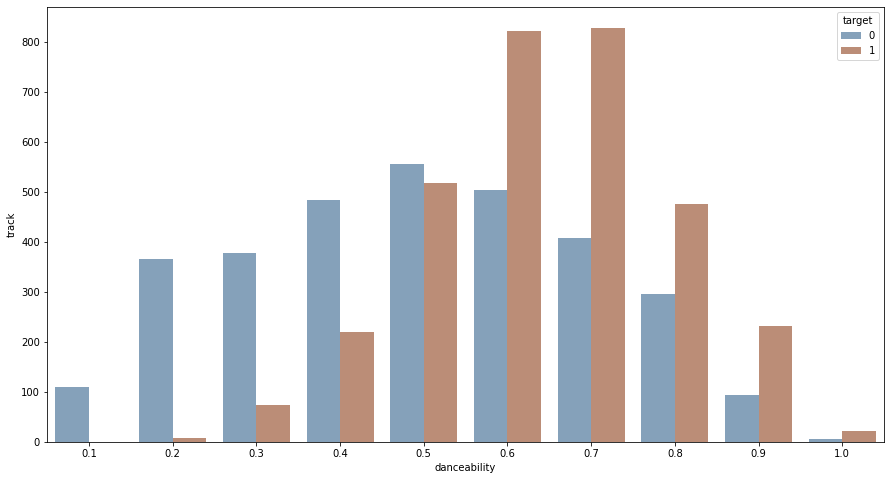

In [26]:
#Grafiquemos, por capacidad de baile, la cantidad de canciones. Esto teniendo 1 barra por target

plt.figure(figsize=(15,8))

sns.barplot(data=df_danceability_tracks, x=df_danceability_tracks['danceability'], 
            y=df_danceability_tracks['track'], hue='target', palette='twilight_shifted')

Tal como se dedujo, a menor capacidad de baile, hay más pistas que no son hits.

Con un valor de "danceability" intermedio (en torno a 0.5), la cantidad de psitas que son hits y la cantidad de pistas que no lo son, es muy similar.

A partir de valores de danceability mayores a 0.6, hay mucha mayor cantidad de pistas que son hits respecto a las que no lo son.

# 

### Análisis tempo - danceability

El tempo es la velocidad o el ritmo de una pista.

Sabemos que "danceability" es la capacidad de baile.

Si bien el tempo, entre otras variables, influye en la capacidad de baile. Hay una alta relación entre estas?

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tempo', ylabel='danceability'>

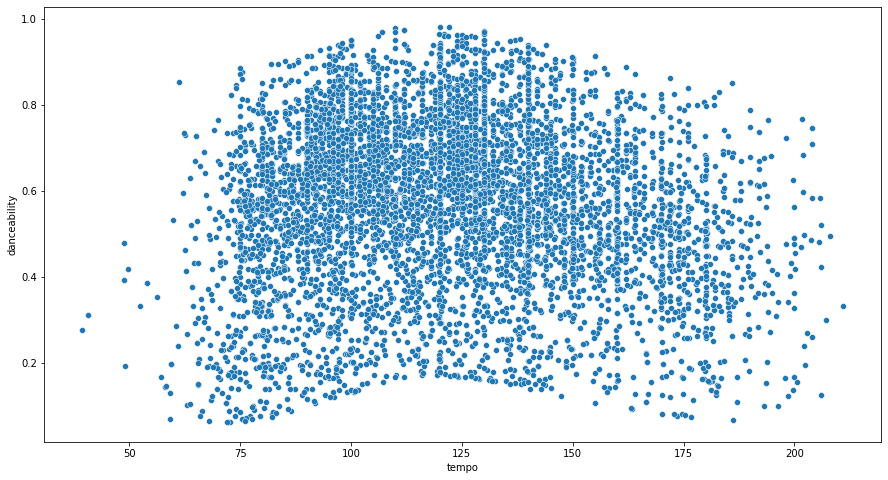

In [27]:
plt.figure(figsize=(15,8))

sns.scatterplot( df_spotify['tempo'], df_spotify['danceability'])

A pesar de que vemos una especie de parábola con vértice en tempo=125, podemos ver que los datos están completamente dispersos, por lo que no hay una alta relación entre estas 2 variables

# 

### Analisis liveness - acousticness

Queremos analizar la relación entre las variables liveness y acousticness. Se espera que, o sea una pista en vivo, o sea una pista acústica, siendo estas variables relacionadas de forma inversa.

No se esperan valores en donde ambos sean 0 o ambos sea 1.

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='acousticness', ylabel='liveness'>

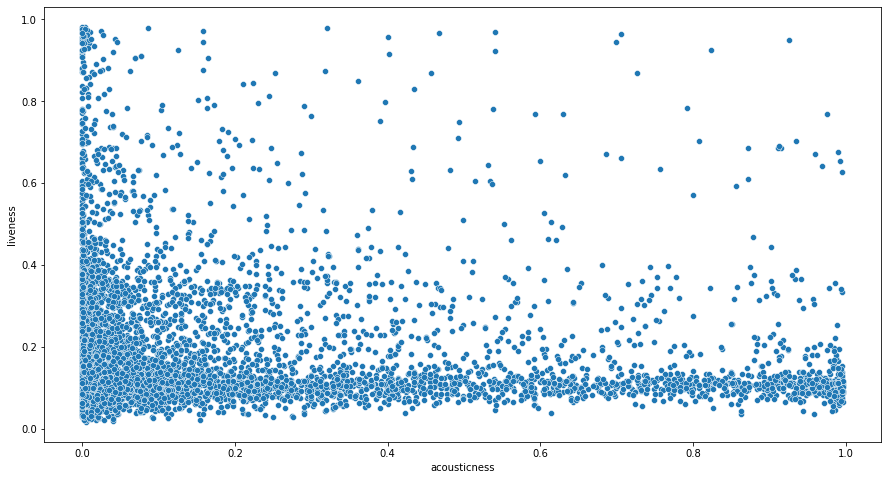

In [28]:
plt.figure(figsize=(15,8))

sns.scatterplot( df_spotify['acousticness'], df_spotify['liveness'])

Viendo la relación entre ambas variables, no encontramos lo que esperamos.

Si bien vemos que no hay muchos casos deonde ambos valores tiendan a 1, vemos que hay una gran concentración de valores donde ambas variables están cercanas a 0.

# 

### Análisis energy - tempo

Siendo la energía una medida perceptiva de intesidad, y el tempo la velocidad o el ritmo, podría considerarse que estas variables están relacionadas

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='energy', ylabel='tempo'>

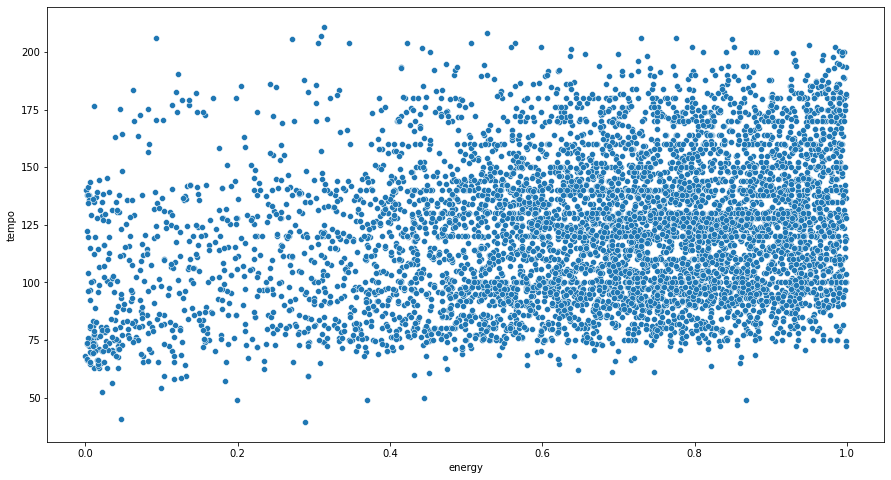

In [29]:
plt.figure(figsize=(15,8))

sns.scatterplot( df_spotify['energy'], df_spotify['tempo'], palette='colorblind')

Vemos una alta dispersión de estas variables, por lo que la correlación es baja.

Puede destacarse una concentración en valores altos de energía, es decir, hay mas pistas con valores altos de energía

# 

# 

## ANÁLISIS RESUMEN

Luego de haber hecho análisis respecto a comportamientos esperados de las variables y sus relaciones, y contrastado los resultados con la hipótesis inicial o el valor buscado, podemos ver el resumen de las relaciones entre las variables

# 

### Distribuciones completas

Veamos la distribución de todas las variables juntas y resumamos.

Para ello, quedemosnos solo con las numericas

In [30]:
columnas_numericas = df_spotify.columns[3:]

columnas_numericas = columnas_numericas.drop(['categorical_speechiness', 'duration_ms'])

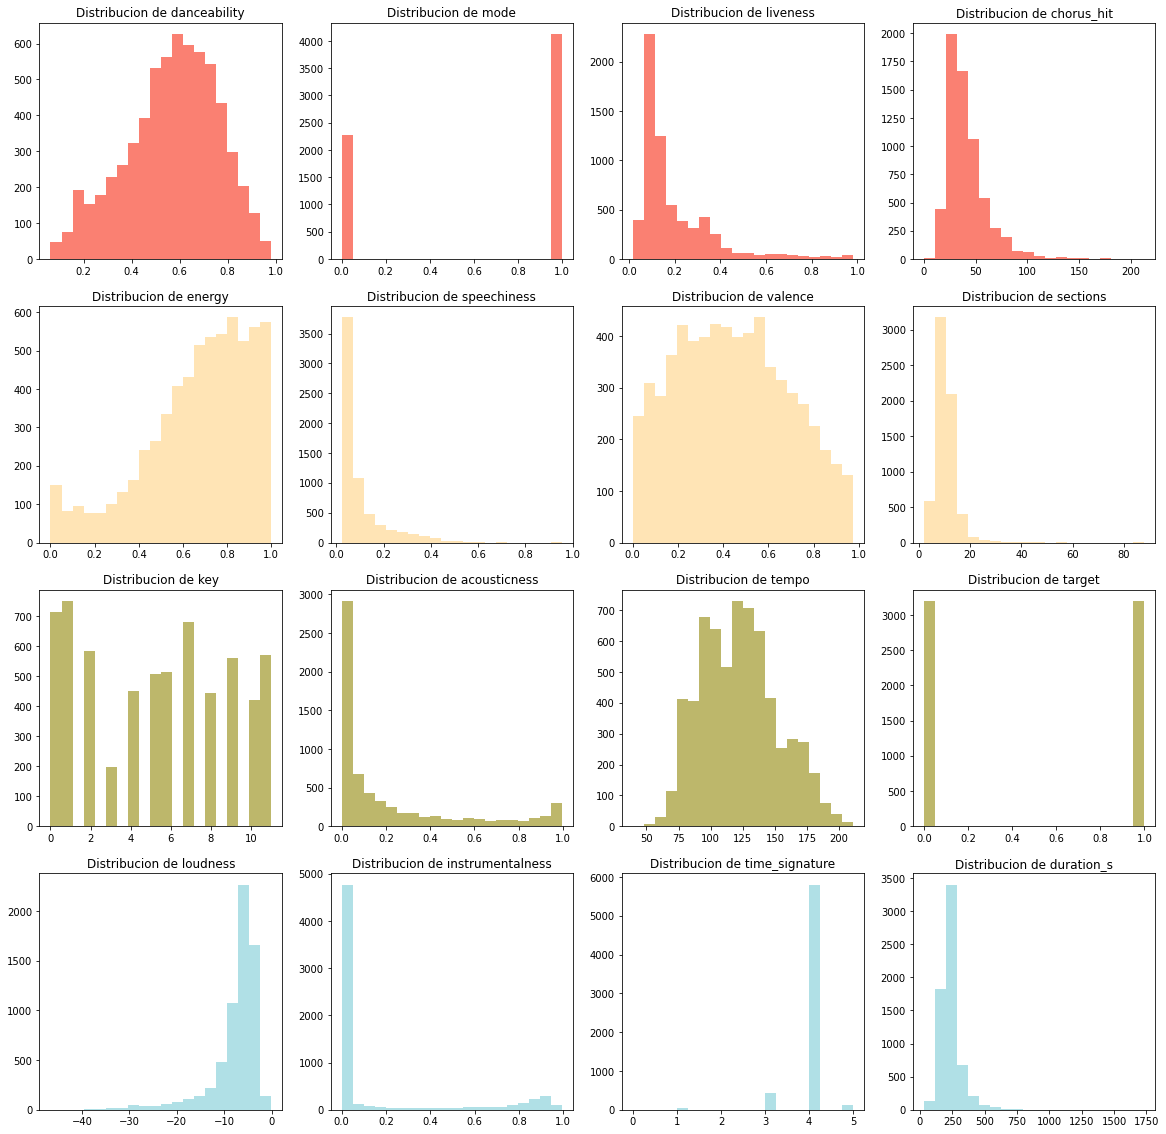

In [31]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
colores = ['salmon', 'moccasin', 'darkkhaki', 'powderblue']

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df_spotify[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')

fila_i = 0
columna_j = 0
    
for column in columnas_numericas:
    ax[fila_i, columna_j].hist(df_spotify[column], bins = 20, color = colores[fila_i])
    ax[fila_i, columna_j].set_title('Distribucion de '+column)
    
    fila_i+=1
    if fila_i==4:
        fila_i=0
        columna_j+=1

    - danceability: Vemos valores de capacidad de baile tendientes a ser más altos, con una distribución levemente sesgada a la izquierda.
    
    - mode: Casi el doble de canciones con moda = 1, respecto a las moda = 0.
    
    - liveness: distribución asimétrica sesgada a la derecha. Muchas pistas no son en vivo.
    
    - chorus_hit: distribución asimétrica sesgada a la derecha.
    
    - energy: las pistas suelen tener mucha energía
    
    - speechiness: distribución asimétrica sesgada a la derecha. La mayor cantidad de pistas no son "relatadas".
    
    - valence: distribución bastante constante. Contamos con una mezcla de pistas de sentimientos positivos y negativos.
    
    - sections: predominan pistas con pocas secciones.
    
    - acousticness: predominan las pistas con bajo nivel acústico.
    
    - loudness: distribución asimétrica sesgada a la izquierda. En torno a los -10 db se concentran las pistas.
    
    - instrumentalness: pistas con poca instrumentalidad.
    
    - duration_s: Las pistas suelen durar menos 4 minutos o menos.

# 

### Veamos las correlaciones de las variables

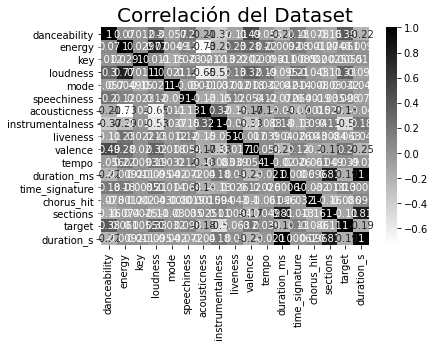

In [32]:
plt.title('Correlación del Dataset', fontsize=20)
plt.rcParams['figure.figsize'] = (20, 20)

sns.heatmap(df_spotify.corr(), annot=True, cmap='binary')
plt.show()

Podemos ver que las variables con alta correlación son:

- loudness - energy
- acousticness - energy
- acousticness - loudness
- sections - duration_s


Cabe destacar que duration_s tiene alta correlación con duration_ms, porque una fue creada a partir de la otra.

En nuestro caso, descartaremos los milisegundos

También es interesante remarcar que hay una correlación media de la variable target con las variables instrumentalness, loudeness y danceability. Esto puede ser importante, lo tendremos en cuenta.

# 

### Dispersión entre variables sin distinción de target

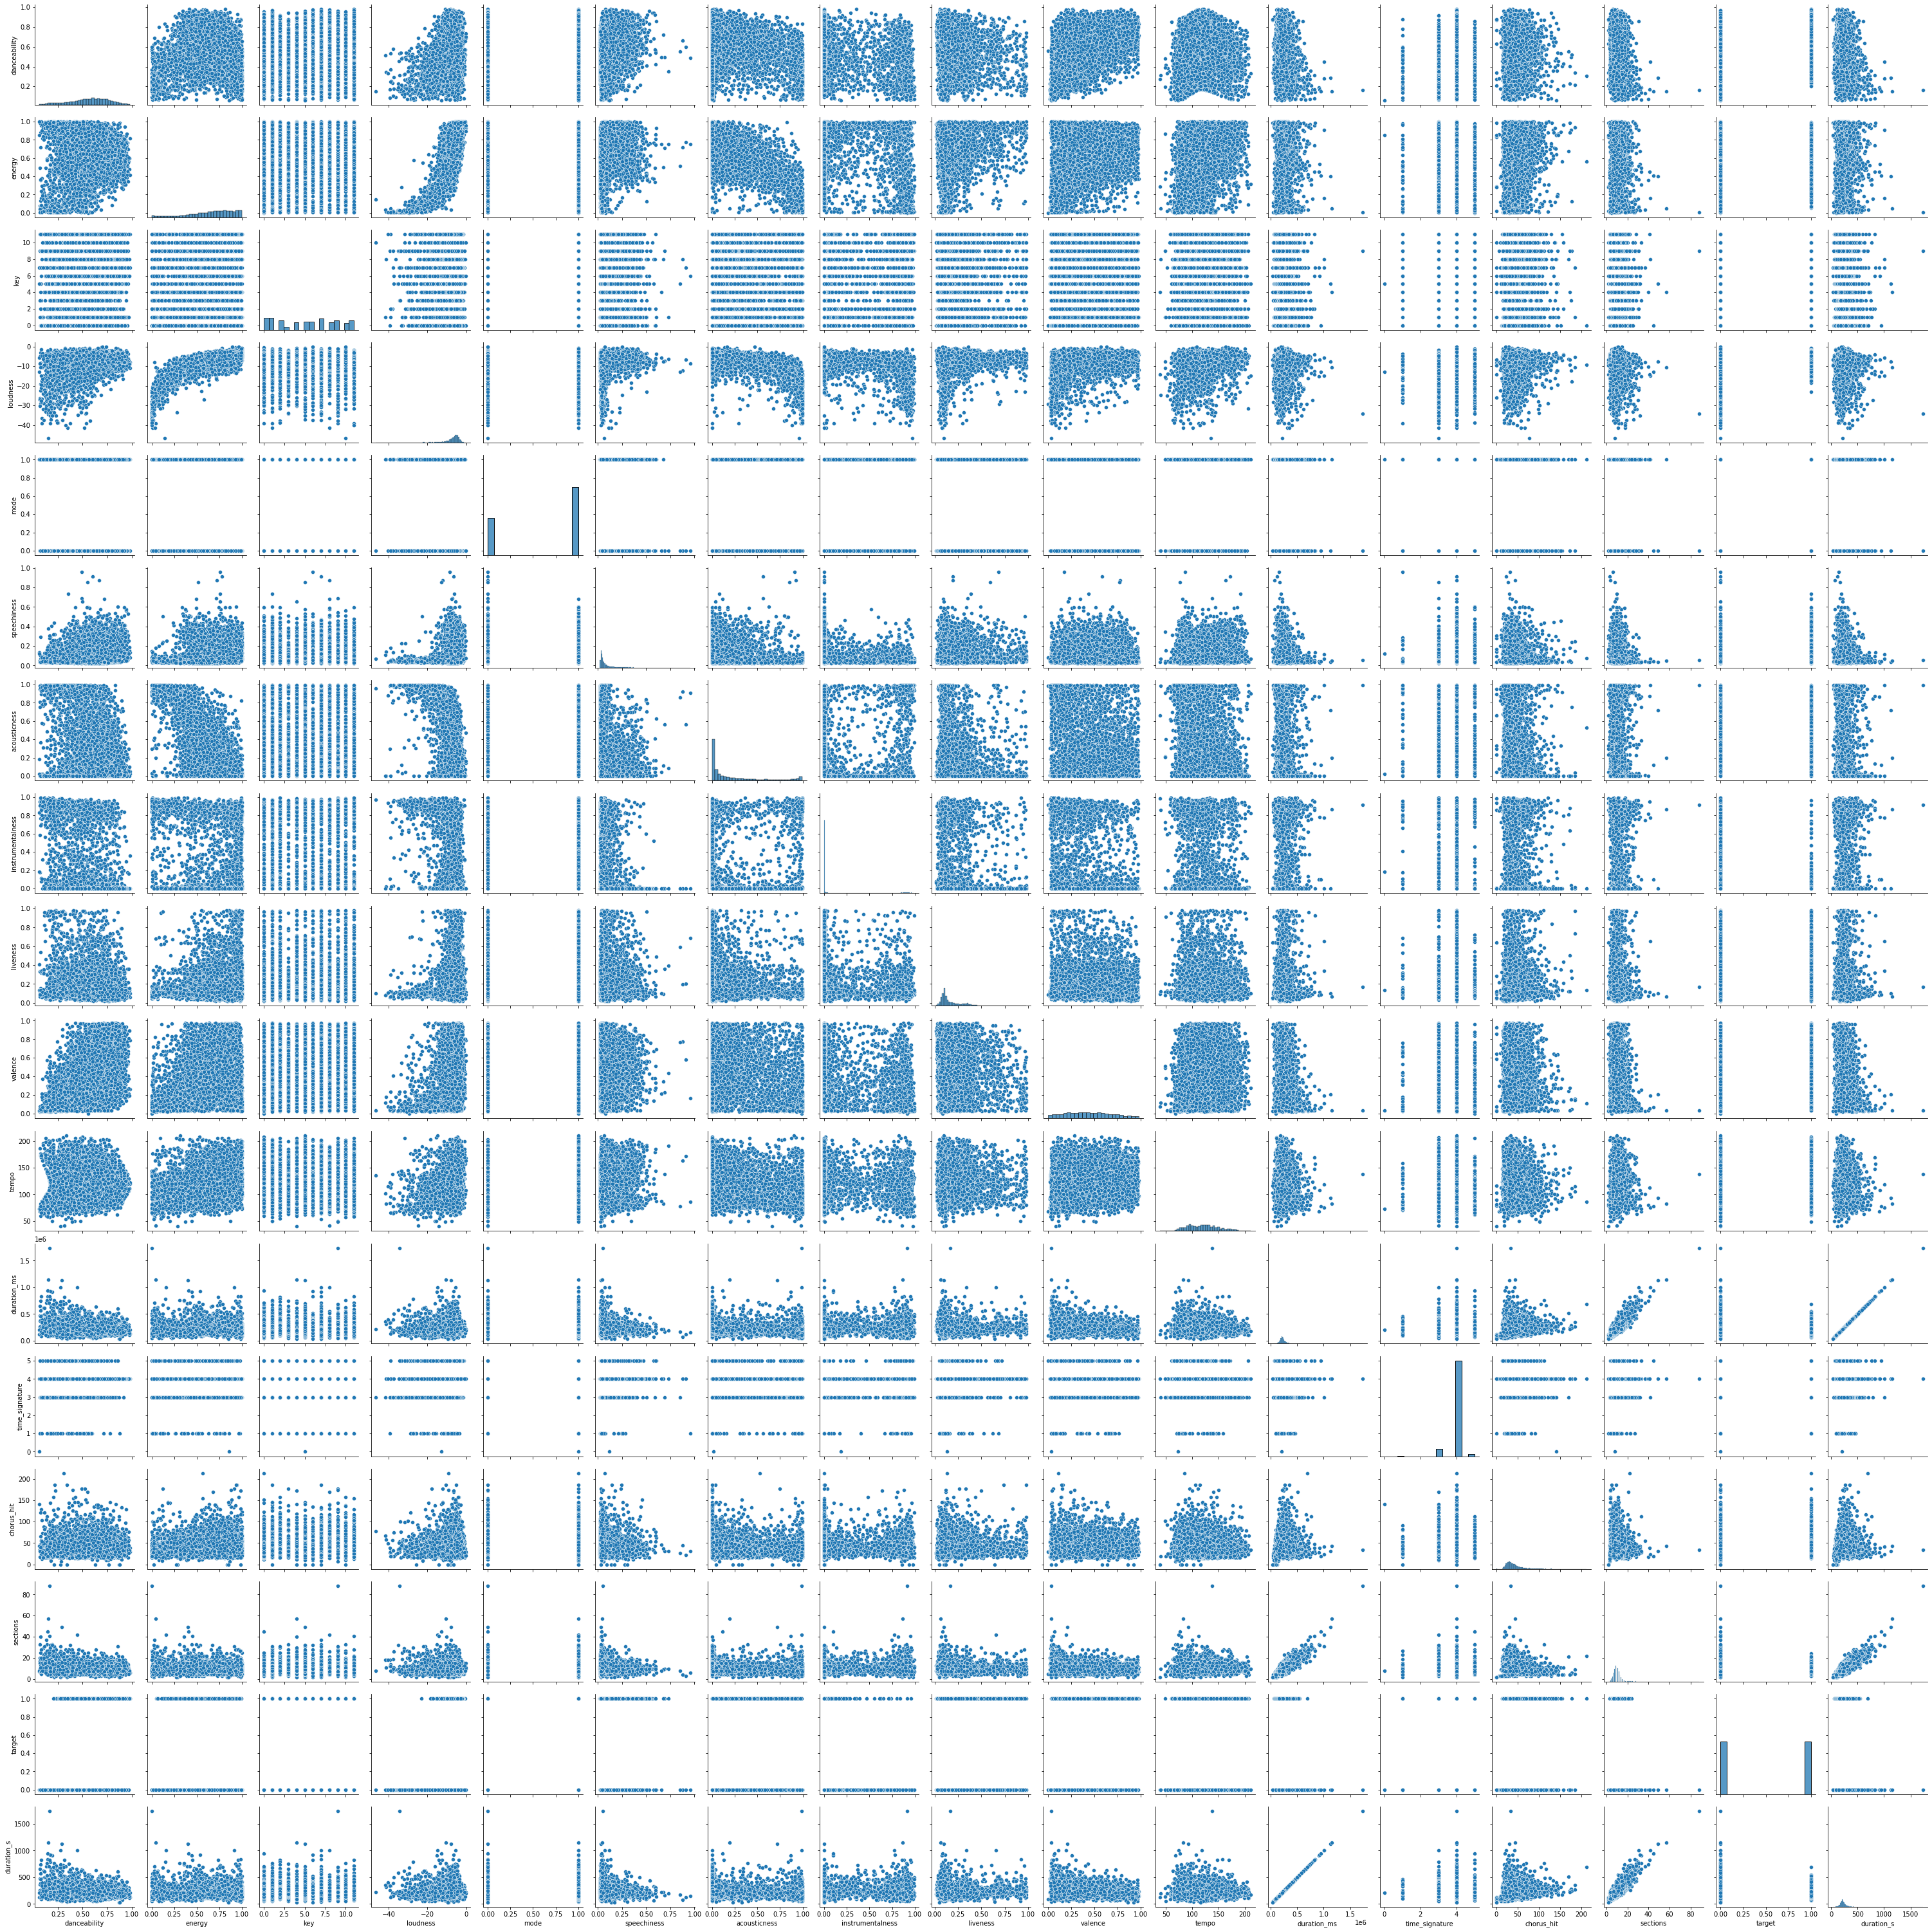

In [33]:
sns.pairplot(df_spotify)

# 

# 

# Dataset final

Pasemos a armar nuestro dataset final

En primer lugar, eliminamos las canciones con uri duplicadas

In [34]:
df_spotify_sin_uris_duplicadas = df_spotify[~df_spotify['uri'].isin(uris_duplicadas)].reset_index(drop=True)

df_spotify_sin_uris_duplicadas.head()

track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.0886       0.02000             0.000    0.0828    0.706   
1     0       0.0346       0.87100             0.814    0.0946    0.250   
2     0       0.0520       0.16100             0.000    0.1080    0.274   
3     0       0.0527       0.00513             0.000    0.2040    0.291   
4     1       0.2750       0.00381             0.000    0.3910    0.780   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  \
0  108.029       188493               4    41.18681        10       1   
1  155.489       176880               3    33.18083         9       0   
2  172.065       205463               4    44.89147         9       1   
3   91.837       193043               4    29.52521         7       0   
4  160.517       144244               4    24.99199         8       1   

  categorical_speechiness  duration_s  
0      CANCIONES Y PISTAS       188.0  
1      CANCIONES Y PISTAS       177.0  
2      CANCIONES Y PISTAS       205.0  
3      CANCIONES Y PISTAS       193.0  
4      CANCIONES Y PISTAS       144.0

Eliminamos columnas creadas para el EDA y las que no vamos a utilizar:

    - categorical_speechiness: creada para el EDA.
    
    - duration_ms: utilizaremos la duración en segundos.
    
    - sections: tiene alta correlación con la duración, utilizaremos la duración ya que las secciones no son relevantes.
    
    - time_signature: el compás también se relaciona con el tiempo y la duración. Podemos descartar esta variable, en caso de no obtener buenos resultados, lo reconsideraremos

In [35]:
df_spotify_solo_columnas_utilizadas = df_spotify_sin_uris_duplicadas.drop(columns=['categorical_speechiness', 'duration_ms',
                                                                                   'sections', 'time_signature'])

df_spotify_solo_columnas_utilizadas.head()

track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.0886       0.02000             0.000    0.0828    0.706   
1     0       0.0346       0.87100             0.814    0.0946    0.250   
2     0       0.0520       0.16100             0.000    0.1080    0.274   
3     0       0.0527       0.00513             0.000    0.2040    0.291   
4     1       0.2750       0.00381             0.000    0.3910    0.780   

     tempo  chorus_hit  target  duration_s  
0  108.029    41.18681       1       188.0  
1  155.489    33.18083       0       177.0  
2  172.065    44.89147       1       205.0  
3   91.837    29.52521       0       193.0  
4  160.517    24.99199       1       144.0

Nos quedaremos por un lado, las columnas descriptivas de la pista en sí, 'track', 'artist' y 'uri'.

Por el otro lado, las columnas con características de las pistas, siendo las que utilizaremos en el modelo.

Cabe destacar que, en caso de querer utilizar todas juntas podremos unirlas por índice, importante no resetear el índice ni modificar ordenes para no perder la relación.

In [36]:
df_spotify_columnas_descriptivas = df_spotify_solo_columnas_utilizadas.iloc[:,:3]

df_spotify_columnas_descriptivas.columns

Index(['track', 'artist', 'uri'], dtype='object')

In [37]:
df_spotify_final = df_spotify_solo_columnas_utilizadas.iloc[:,3:]

df_spotify_final.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.741   0.626    1    -4.826     0       0.0886       0.02000   
1         0.447   0.247    5   -14.661     0       0.0346       0.87100   
2         0.550   0.415    9    -6.557     0       0.0520       0.16100   
3         0.502   0.648    0    -5.698     0       0.0527       0.00513   
4         0.807   0.887    1    -3.892     1       0.2750       0.00381   

   instrumentalness  liveness  valence    tempo  chorus_hit  target  \
0             0.000    0.0828    0.706  108.029    41.18681       1   
1             0.814    0.0946    0.250  155.489    33.18083       0   
2             0.000    0.1080    0.274  172.065    44.89147       1   
3             0.000    0.2040    0.291   91.837    29.52521       0   
4             0.000    0.3910    0.780  160.517    24.99199       1   

   duration_s  
0       188.0  
1       177.0  
2       205.0  
3       193.0  
4       144.0

# 

### Dispersión entre variables con distinción de target del df final

In [ ]:
sns.pairplot(df_spotify_final, hue="target")

# 

# 

# PCA

Veamos con un análisis de componentes principales, cómo se explican las variables y su variabilidad.

Actualmente tenemos 13 variables Probemos con 5 componentes

In [ ]:
X_values = df_spotify_final.drop(columns='target')

X_values

In [ ]:
pca = PCA(n_components=5)
df_spotify_final_pca = pca.fit_transform(X_values) 
pca.explained_variance_ratio_

Probamos utilizar 5 componentes, pero podemos ver que con 3 componentes podemos "explicar" el 98% de los datos, siendo esto de gran utilidad ya que contábamos inicialmente con 13 variables.